# MCC-RGB vs MCC

This is a simple example of applying `pymccrgb`'s ground classification algorithm to a multispectral lidar dataset with colors at each point. It is compared to the MCC algorithm devloped by [Evans and Hudak, 2007](https://doi.org/10.1109/TGRS.2006.890412).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pymccrgb.core import mcc, mcc_rgb
from pymccrgb.plotting import plot_points_3d, plot_results
from pymccrgb.datasets import load_mammoth_lidar

First, we load the dataset, a lidar point cloud over Horseshoe Lake near Mammoth Mountain, CA. This was acquired by the [National Center for Airborne Laser Mapping](http://ncalm.cive.uh.edu/) with an Optech Titan three-channel lidar scanner.

In [3]:
data = load_mammoth_lidar(npoints=1e6)

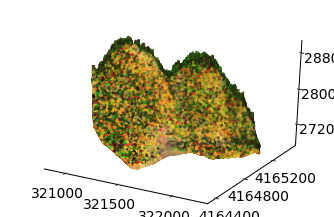

In [9]:
plot_points_3d(data)

We can use the standard MCC algorithm (`mcc`) to classify the points by relative height.

In [5]:
data_mcc, labels_mcc = mcc(data, verbose=True)

--------------------
MCC iteration
--------------------
Scale: 0.50, Relative height: 3.0e-01, iter: 0
Removed 314976 nonground points (31.50 %)
--------------------
MCC iteration
--------------------
Scale: 0.50, Relative height: 3.0e-01, iter: 1
Removed 90793 nonground points (13.25 %)
--------------------
MCC iteration
--------------------
Scale: 0.50, Relative height: 3.0e-01, iter: 2
Removed 24723 nonground points (4.16 %)
--------------------
MCC iteration
--------------------
Scale: 0.50, Relative height: 3.0e-01, iter: 3
Removed 7501 nonground points (1.32 %)
--------------------
MCC iteration
--------------------
Scale: 0.50, Relative height: 3.0e-01, iter: 4
Removed 3361 nonground points (0.60 %)
--------------------
MCC iteration
--------------------
Scale: 1.00, Relative height: 3.0e-01, iter: 0
Removed 10577 nonground points (1.89 %)
--------------------
MCC iteration
--------------------
Scale: 1.00, Relative height: 3.0e-01, iter: 1
Removed 2768 nonground points (0.51 %)

... or use MCC-RGB  (`mcc_rgb`) to classify points by relative height and color. 

To do this, we specify a training height tolerance. In this case, points over 0.3 m relative height will be considered vegetation (non-ground) points. These points are used to train a color-based classifer that is used to re-classify low non ground points.

In [6]:
data_new, labels_new = mcc_rgb(data, verbose=True)

--------------------
MCC step
--------------------
Scale: 0.50, Relative height: 3.0e-01, iter: 0
Removed 314976 nonground points (31.50 %)
--------------------
Classification update step
--------------------
Scale: 0.50, Relative height: 3.0e-01
Removed 168135 nonground points (16.81 %)
--------------------
MCC step
--------------------
Scale: 0.50, Relative height: 3.0e-01, iter: 1
Removed 10830 nonground points (1.08 %)
--------------------
MCC step
--------------------
Scale: 0.50, Relative height: 3.0e-01, iter: 2
Removed 2340 nonground points (0.23 %)
--------------------
MCC step
--------------------
Scale: 1.00, Relative height: 3.0e-01, iter: 0
Removed 8688 nonground points (0.87 %)
--------------------
MCC step
--------------------
Scale: 1.00, Relative height: 3.0e-01, iter: 1
Removed 2465 nonground points (0.25 %)
--------------------
MCC step
--------------------
Scale: 1.00, Relative height: 3.0e-01, iter: 2
Removed 1321 nonground points (0.13 %)
--------------------
MCC 

Finally the `plot_results` convenience function compares the final results of each algorithm visually.

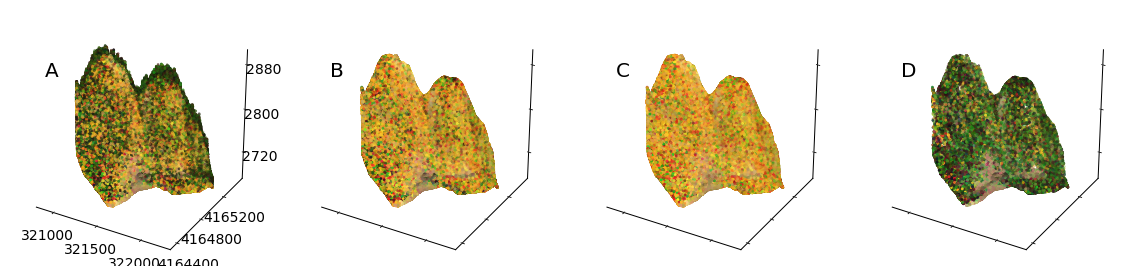

In [7]:
plot_results(data, labels_mcc, labels_new)